# Implied Volatility

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120
import numpy as np

from volkit import implied_vol_euro_future
from volkit.datasets import spxw

## Read Sample Data

We pick the options with an expiration date of 2 days, and at least 1 trade in both the call and put of the same strike.

In [6]:
df = spxw(min_volume=1, D=2)

T = df['T'].values
K = df['K'].values
F = (df['F_bid'].values[0] + df['F_ask'].values[0]) / 2

## Compute 3 Implied Volatility curves: bid, ask, mid 

In [7]:
# interest rate
r = 0.03

# Compute implied volatilies
iv_bid = implied_vol_euro_future( df['C_bid'] , F, K, T, r, cp=1)
iv_ask = implied_vol_euro_future( df['C_ask'], F, K, T, r, cp=1)
iv_mid = implied_vol_euro_future( (df['C_bid'] + df['C_ask'])/2, F, K, T, r, cp=1)

## Plot the Implied Volatilities

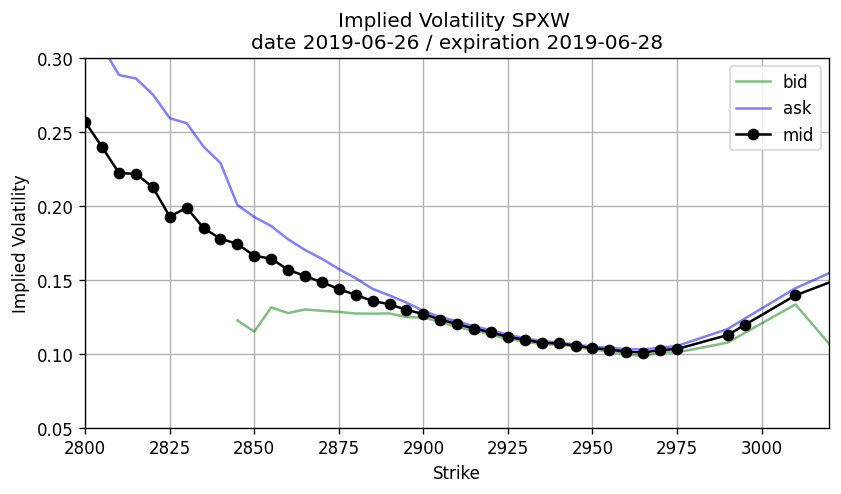

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.plot(K, iv_bid, 'g-', alpha=.5, label='bid')
plt.plot(K, iv_ask, 'b-', alpha=.5, label='ask')
plt.plot(K, iv_mid, 'ko-', label='mid')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility SPXW \ndate 2019-06-26 / expiration 2019-06-28')
plt.xlim(2800,3020)
plt.ylim(0.05, 0.3)
plt.legend()
plt.grid()
plt.show()